In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('prediction.csv')

if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,2,3,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,2,3,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,1,3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,2,3,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


In [93]:
X = df.drop(columns=["Channel", "Region"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [119]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
k_labels = kmeans.fit_predict(X_scaled)
df["KMeans_Cluster"] = k_labels
print(df["KMeans_Cluster"].value_counts())
silhouette = silhouette_score(X_scaled, k_labels)
davies = davies_bouldin_score(X_scaled, k_labels)
print(f"Silhouette Score for k=3: {score:.3f}")
print("Davies-Bouldin Score:", davies)

KMeans_Cluster
2    213
1    147
0     80
Name: count, dtype: int64
Silhouette Score for k=3: 0.259
Davies-Bouldin Score: 1.3405631342807725


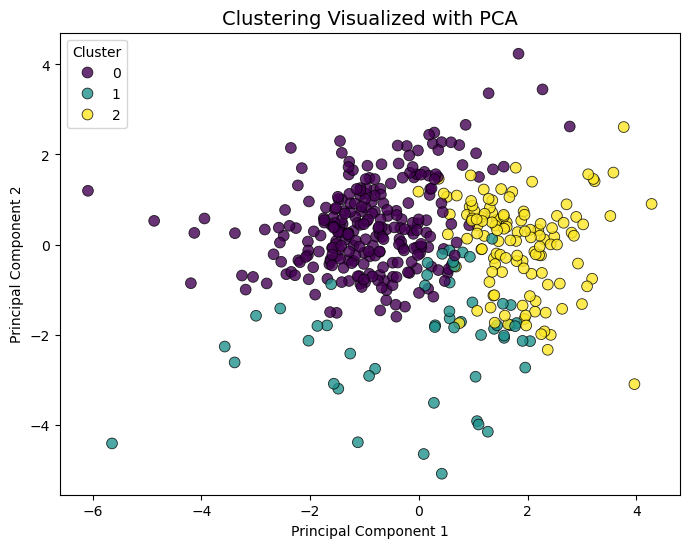

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue=df.columns[-1] if "Cluster" not in df.columns else "Cluster",  # auto-pick
    data=df,
    palette="viridis",
    s=60,
    alpha=0.8,
    edgecolor="k"
)

plt.title("Clustering Visualized with PCA", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


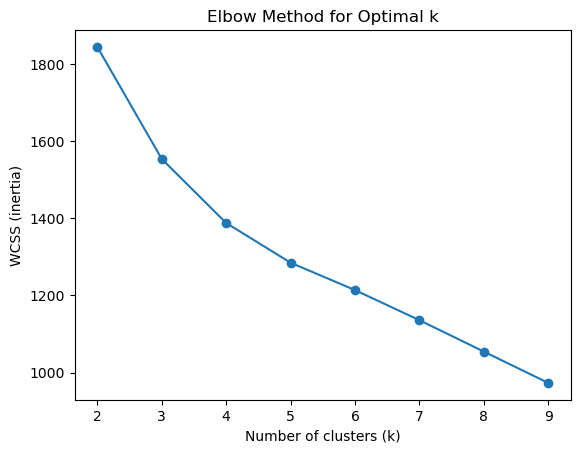

In [118]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [103]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster,PCA1,PCA2
0,2,3,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,1,1.380383,-0.304727
1,2,3,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,1,1.438870,0.537468
2,2,3,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,1,1.513453,1.232565
3,1,3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,2,-0.825105,1.210790
4,2,3,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,1,0.802897,1.766046


Cluster counts:
DBSCAN_Cluster
-1     26
 0    414
Name: count, dtype: int64


C:\Users\Manoj\AppData\Local\Temp\ipykernel_15860\675836435.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DBSCAN_Cluster", data=df, palette="Set2")


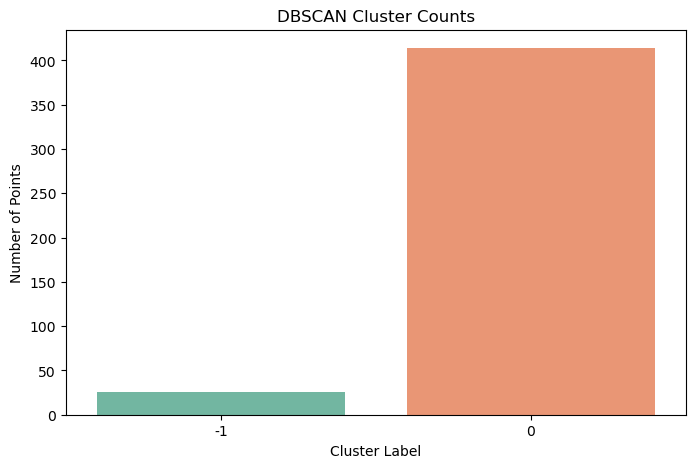

In [121]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

dbscan = DBSCAN(eps=1.7, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = db_labels

print("Cluster counts:")
print(df["DBSCAN_Cluster"].value_counts().sort_index())
plt.figure(figsize=(8, 5))
sns.countplot(x="DBSCAN_Cluster", data=df, palette="Set2")
plt.title("DBSCAN Cluster Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.show()

Silhouette Score: 0.3949147493933562
Davies-Bouldin Index: 2.327597521707803
Calinski-Harabasz Score: 26.78998563618619


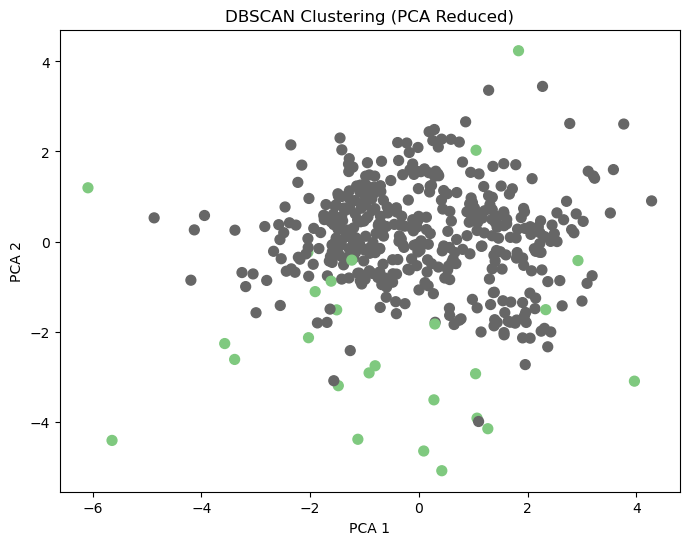

In [110]:
import numpy as np
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
res = []
if len(set(db_labels)):
    silhouette = silhouette_score(X_pca, db_labels)
    db_index = davies_bouldin_score(X_pca, db_labels)
    db_ch = calinski_harabasz_score(X_pca, db_labels)
else:
    silhouette, db_index, db_ch = np.nan, np.nan, np.nan

res.append([silhouette, db_index, db_ch, np.nan])

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Score:", db_ch)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap="Accent", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.show()

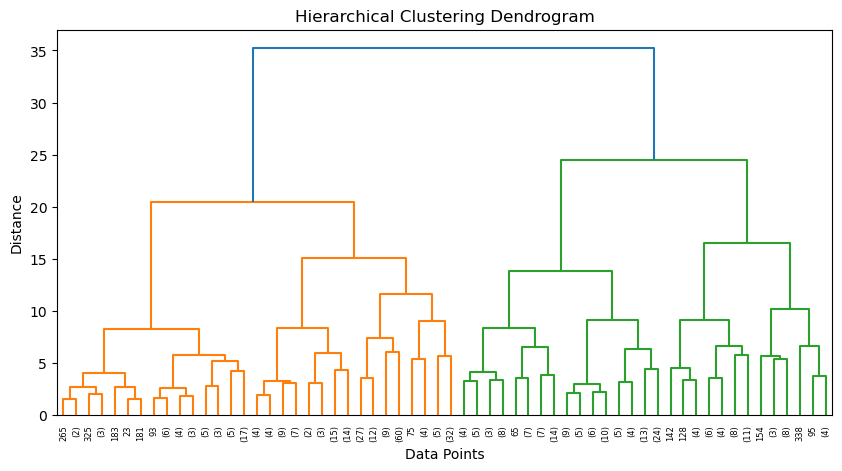

In [111]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels = hier.fit_predict(X_scaled)

df["Hier_Cluster"] = hier_labels

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [112]:
hier_silhouette = silhouette_score(X_scaled, hier_labels)
hier_davies = davies_bouldin_score(X_scaled, hier_labels)
hier_calinski = calinski_harabasz_score(X_scaled, hier_labels)

print("Silhouette Score:", hier_silhouette)
print("Davies-Bouldin Score:", hier_davies)

Silhouette Score: 0.2546567404941345
Davies-Bouldin Score: 1.5389948670687705
